# Classification Problem
Next I will develop a Logistic Regression model to predict different classes. More specifically Logistic Regression is used to estimate the probability that an instance, element or observation belongs to a certain class. The use of one of the most popular collections of information for the purpose of classification is the Titanic dataset and the model I have developed will be submitted to Kaggle's 'Titanic - Machine Learning from Disaster' competition.

The purpose of this model is to identify if these passengers 'Survived' or 'Not' which will involve creating a target output column populated with simple binary results of '1' or '0'.

## Import the Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve
%matplotlib inline

## Ingest the Data

In [2]:
titanic = pd.read_csv('C:/Users/lynst/Documents/GitHub/machine-learning-projects/supervised-learning/regression/titanic_data.csv')
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [3]:
# check the column names and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   183 non-null    int64  
 1   PassengerId  183 non-null    int64  
 2   Survived     183 non-null    int64  
 3   Pclass       183 non-null    int64  
 4   Name         183 non-null    object 
 5   Sex          183 non-null    object 
 6   Age          183 non-null    float64
 7   SibSp        183 non-null    int64  
 8   Parch        183 non-null    int64  
 9   Ticket       183 non-null    object 
 10  Fare         183 non-null    float64
 11  Cabin        183 non-null    object 
 12  Embarked     183 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 18.7+ KB


So I can determine there are a total of 183 entries in this dataset. Initial thoughts are that it might be worth using a more comprehensive dataset, one which might contain the full list of passengers (1309) rather than just a subset (183). This is the most comprehensive list available for the purpose of this exercise that I can find, although estimates for the total number of passengers and crew members are thought to be in the region of 2220. The most comprehensive datasets might be Encyclopedia Titanica and Wikipedia, both of which can be found online.

In [4]:
# importing once again
titanic = pd.read_csv('C:/Users/lynst/Documents/GitHub/machine-learning-projects/supervised-learning/regression/titanic.csv',
                     header=0,
                     names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin',
                              'Embarked','WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination','Lifeboat','Body',
                              'Class'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Feature Selection
Removing unwanted columns and rows and feature engineering is the next important step. Straight away I can see the second dataset I have imported from Kaggle which I have named 'titanic.csv' has a more comprehensive number of entries but also contains 21 columns as opposed to just 12 in the first set. Time to establish which of these columns will be kept or removed using some dimensionality reduction and combination, before establishing what is to be included in a Pandas DataFrame table and target Series.

In [5]:
# check the column names and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

I can remove 'PassengerId', 'Name', 'Age', 'Ticket', 'Embarked', 'WikiId', 'Name_wiki', 'Hometown', 'Destination', 'Lifeboat', 'Body', 'Fare' and 'Class' which will significantly reduce clutter in my table as these features provide no causal relationship with passenger Survival, some of which also represent duplicated information such as passenger class 'Pclass' and 'Class'. This initial step of reducing the size helps provide a much more useful dataset overall.
Next, let's determine the index and column values.

In [6]:
titanic.shape

(1309, 21)

Also I can find the number of entries or range of the index using:

In [7]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

So the index starts at 0 and ends at 1309, a total of 1310 passengers (not including crew members), but in terms of the data entries in this table only 891 are labeled with target predictions, 419 are unlabeled, meaning the 'Survived' target column only has the first 891 entries populated.

### Some Descriptive Stats
Several of these values can come in handy in case I need to impute any averages for missing values later. Bear in mind this only contains data for columns with numeric values!

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

### Dropping Columns
Store a copy of these columns in a new variable or dataset so I don't overwrite the information.

In [10]:
titanic_new = titanic[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked',
                       'WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination','Lifeboat','Body','Class']]
titanic_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


The easiest way to drop the columns not required is to create a new subset of data (2d array) with the specified columns to be used.

In [11]:
titanic_reduced = titanic_new[['Survived','Pclass','Sex','SibSp','Parch','Cabin','Age_wiki','Boarded']]
titanic_reduced.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Age_wiki,Boarded
0,0.0,3,male,1,0,NaN,22.0,Southampton
1,1.0,1,female,1,0,C85,35.0,Cherbourg
2,1.0,3,female,0,0,NaN,26.0,Southampton
3,1.0,1,female,1,0,C123,35.0,Southampton
4,0.0,3,male,0,0,NaN,35.0,Southampton


I am using 'Age_wiki' from the Wikipedia web site which appears to be a much more comprehensive set of data than that of the 'Age' column. The 'Boarded' column has nominal data which I will endeavour to convert to numeric values so each port a passenger embarks from will be represented by a number instead. This will help provide more uniform data types. 'Sex' can also be converted to 0's or 1's for the purpose of this exercise and the 'SibSp' and 'Parch' columns can be combined using feature extraction to concatenate the size of families into a new series. The 'Cabin' data will be converted to binary integer values for simplicity and the 'Pclass' (Passenger Class) observations are already denoted as integer values. These appear to have a significant impact on passenger survival so I'm including them.

Reducing the number of features is called dimensionality reduction and is an important technique used to achieve comparable results in a much faster time frame (with little benefit to performance accuracy), but generally works better with much larger datasets. The removal of all the unwanted columns contained in the modified dataset variable helps speed the model up.

In [12]:
# Partial or subset of titanic dataframe
df = pd.DataFrame({
    'Survived': pd.Series(titanic_reduced['Survived']),
    'Pclass': pd.Series(titanic_reduced['Pclass']),
    'Sex': pd.Series(titanic_reduced['Sex']),
    'SibSp': pd.Series(titanic_reduced['SibSp']),
    'Parch': pd.Series(titanic_reduced['Parch']),
    'Cabin': pd.Series(titanic_reduced['Cabin']),
    'Age_wiki': pd.Series(titanic_reduced['Age_wiki']),
    'Boarded': pd.Series(titanic_reduced['Boarded'])
})

print(df)

      Survived  Pclass     Sex  SibSp  Parch Cabin  Age_wiki      Boarded
0          0.0       3    male      1      0   NaN      22.0  Southampton
1          1.0       1  female      1      0   C85      35.0    Cherbourg
2          1.0       3  female      0      0   NaN      26.0  Southampton
3          1.0       1  female      1      0  C123      35.0  Southampton
4          0.0       3    male      0      0   NaN      35.0  Southampton
...        ...     ...     ...    ...    ...   ...       ...          ...
1304       NaN       3    male      0      0   NaN      23.0  Southampton
1305       NaN       1  female      0      0  C105      39.0    Cherbourg
1306       NaN       3    male      0      0   NaN      43.0  Southampton
1307       NaN       3    male      0      0   NaN      34.0  Southampton
1308       NaN       3    male      1      1   NaN       4.0    Cherbourg

[1309 rows x 8 columns]


In [13]:
type(df)

pandas.core.frame.DataFrame

Which columns or features are left now?

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Age_wiki',
       'Boarded'],
      dtype='object')

## Clean the Data
### Missing Values
Next it's really important to remove or impute any Null or missing values. This depends on any row values which are missing and also on the data type for each column. Calculating the total number of missing or Null values across the 'titanic' dataframe gives:

In [15]:
titanic_missing = pd.isnull(titanic).sum()
print(titanic_missing)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64


More specifically, to narrow my workable dataset down and find the total number of missing values from the training set of predictor variables, X:

In [16]:
df_missing = pd.isnull(df).sum()
print(df_missing)

Survived     418
Pclass         0
Sex            0
SibSp          0
Parch          0
Cabin       1014
Age_wiki       7
Boarded        5
dtype: int64


Next it becomes useful to determine if these missing values occurred because they weren't recorded or because there was no information for them? Assessing this output I can determine that the null values in 'Cabin' simply represent those who did not have a cabin for sleeping quarters and so these would not have been recorded. These passengers would have traveled in other areas of the ship so it's important not to drop these values as they represent important data and account for over three quarters of the overall number of passengers in this particular set. 

There are also five null values for the 'Boarded' column so for whatever reason these passengers did not have their boarding locations recorded. It's impossible to really know which port location these individuals departed from so I can either leave the values as NaN or remove each of these five entries as a value should exist if they boarded legally and other attributes were recorded, e.g. Name, Class, Cabin or even Age.

The 'Age-wiki' feature records the ages provided by passengers when purchasing their tickets so it was likely based on the D.O.B. in their travel documents or passports. Taking a look at the total number of Null or missing values for the 'Age_wiki' column first:

In [17]:
num_age_null = df['Age_wiki'].isnull().sum()
print(num_age_null)

7


Identifying each row in the dataframe which contains a null value for 'Age_wiki' and assigning it to a new variable called 'age_null' (as I may require this later). Let's see all seven entries.

In [18]:
age_null = df[df['Age_wiki'].isnull()]
print(age_null)

      Survived  Pclass     Sex  SibSp  Parch Cabin  Age_wiki    Boarded
42         0.0       3    male      0      0   NaN       NaN  Cherbourg
347        1.0       3  female      1      0   NaN       NaN        NaN
420        0.0       3    male      0      0   NaN       NaN  Cherbourg
557        0.0       1    male      0      0   NaN       NaN        NaN
1041       NaN       1  female      0      1   C54       NaN        NaN
1048       NaN       3  female      0      0   NaN       NaN        NaN
1228       NaN       3    male      0      2   NaN       NaN        NaN


I can make a decision whether to include these 7 passengers and merely impute some average age for their respective 'Sex', impute an average based on the overall mean for both genders, or remove them completely. Seeing as the majority of information for each of these passengers (roughly 4/7ths to 5/7ths) is present I would prefer to keep these entries, so imputing mean values for age based on the individuals sex may be a reasonably accurate average.

The mean age for everyone, regardless of sex is 29.88 according to the describe() method above. Another way to find the overall average age is:

In [19]:
df.groupby(df['Age_wiki'].isnull()).mean()

,Survived,Pclass,SibSp,Parch,Age_wiki
Age_wiki,,,,,
False,0.384442,2.294163,0.500768,0.384793,29.415829
True,0.250000,2.428571,0.142857,0.428571,NaN


This overall mean or average may not be as accurate as calculating the average age for both male and female passengers and imputing them into the 7 missing values.

### Calculate Average Age
Calculating the average age for male and female passengers in the table can be done by summing each individual age (by sex) and dividing by the total number of male or female passengers respectively.

In [20]:
# find the total count of each of the two unique values in the Sex column (total male or female passengers)
df['Sex'].value_counts().unique()

array([843, 466], dtype=int64)

So there were a total of 843 Male and 466 Female passengers.

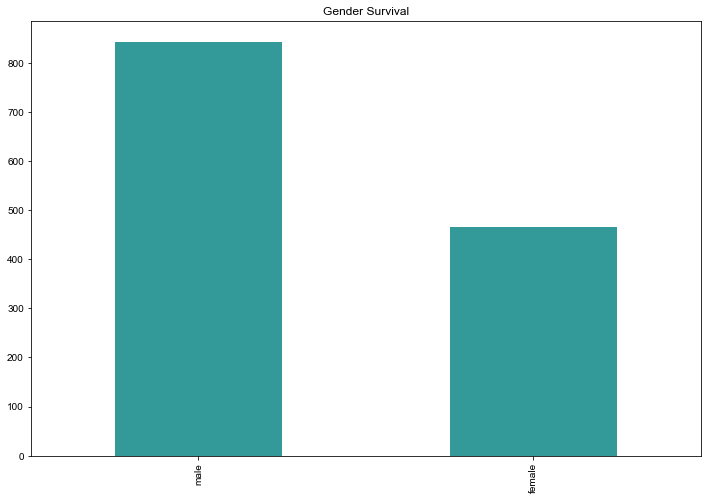

In [21]:
# creating a visual to represent these unique value counts
import seaborn as sns

df['Sex'].value_counts().plot(kind='bar', alpha=0.8, color='teal', figsize=(12,8))
plt.title("Gender Survival")
# create style
sns.set_style("ticks")

So having determined the unique classes within the 'Sex' column I can further identify the number of Males and Females who survived or not. By taking the 'Survived' column and sub-dividing it according to gender it displays how women were far more likely to have survived the Titanic disaster based on the predictor variables included with this dataset.

Next I want to group each category of male and female and store them in a variable called 'gender'.

In [22]:
gender = df.groupby(df['Sex'])
gender.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Age_wiki,Boarded
0,0.0,3,male,1,0,NaN,22.0,Southampton
1,1.0,1,female,1,0,C85,35.0,Cherbourg
2,1.0,3,female,0,0,NaN,26.0,Southampton
3,1.0,1,female,1,0,C123,35.0,Southampton
4,0.0,3,male,0,0,NaN,35.0,Southampton
5,0.0,3,male,0,0,NaN,22.0,Queenstown
6,0.0,1,male,0,0,E46,54.0,Southampton
7,0.0,3,male,3,1,NaN,2.0,Southampton
8,1.0,3,female,0,2,NaN,26.0,Southampton
9,1.0,2,female,1,0,NaN,14.0,Cherbourg


Checking the first few entries for both sexes:

Text(0.5, 1.0, 'Survived or Not for Male and Female Passengers')

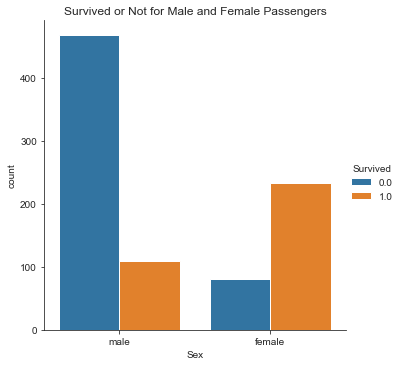

In [23]:
# Import Library
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.title("Survived or Not for Male and Female Passengers")


Now there are two variables, one with all the male and one with all the female passengers in the Titanic dataset. There are a total of 843 male and 466 female passengers.

The next step is to add these totals together.

In [24]:
male_total = 843
female_total = 466
gender_total = male_total + female_total
gender_total

1309

Summing the total of all ages for all the passengers:

In [25]:
age = df['Age_wiki'].sum()
print(age)

38299.41


And dividing by the total number of passengers:

In [26]:
age_ave = age / gender_total
age_ave

29.25852559205501

So the overall average age for all passengers calculates to just over 29 years old, but I want to calculate the average ages for each category. I want to convert all these float values in the 'Age_wiki' column to integers but I need to impute average ages first into the missing values.

So the first item to notice is that only numeric data appears to have been captured which will need to be fixed soon, but the answer I was looking for now, the mean age found under the 'Age-wiki' column is 29.415829 which is close to the value just calculated of 29.258525, but not identical.

Next, to see the average ages for both male and female classes:

In [27]:
df.groupby(by='Sex')['Age_wiki'].mean()

Sex
female    28.418467
male      29.966222
Name: Age_wiki, dtype: float64

So this produces the mean Age by Sex and taking a look at the respective Sex for each missing Age entry above, I can see there are 4 males with missing entries and 3 females. I also know which index number relates to each missing value so I can apply the mean age by sex specifically.

In [ ]:
# Imputing missing values for male and female ages
fem_age_imputed = df.female.fillna(method='bfill', axis=0).fillna(28.418467)
fem_age_imputed

In [ ]:
#df['Age_wiki'] = df['Age_wiki'].astype(int)
#df['a'] = pd.to_numeric(df['a']).round(0).astype(int)
df['Age_wiki'].head()

In [ ]:
male = gender.get_group('male')
male.head(5)

In [ ]:
female = gender.get_group('female')
female.head(5)

I can see that all the variables are numeric except for the 'Boarded' column which is populated with categorical values. I will change these categorical values into numeric values using 'one-hot encoding'.

Viewing the total number of Male passengers who didn't survive (0.0), or did survive (1.0).

In [ ]:
titanic.loc[titanic.Sex == 'male']['Survived'].value_counts().plot(kind='bar', figsize=(8,5))

The total number of Female passengers who didn't survive (0.0), or did survive (1.0).

In [ ]:
titanic.loc[titanic.Sex == 'female']['Survived'].value_counts().plot(kind='bar', figsize=(8,5))

In [ ]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

The next question is 'What do I do with these average ages?' Because there are only 7 values missing for 'Age' I believe imputing the missing values will be more beneficial than simply deleting the entries altogether. 

I will use the fillna() method to replace any Null values with imputed values for the average age for both men and women.

In [ ]:
titanic['Age_wiki'].fillna()

Next, checking the total sum of Null values for the 'Boarded' column:

In [ ]:
num_boarded_null = X['Boarded'].isnull().sum()
print(num_boarded_null)

In [ ]:
X[X['Boarded'].isnull()]

In [ ]:
X.groupby(X['Boarded'].isnull()).mean()

In [ ]:
# remove values within this column which are missing
boarded_values_removed = X['Boarded'].dropna(axis=1)


Finally, checking the total number of Null values for the 'Cabin' feature:

In [ ]:
num_cabin_null = X['Cabin'].isnull().sum()
print(num_cabin_null)

In [ ]:
X[X['Cabin'].isnull()]

What about the string and categorical variables in the dataset? An important consideration to make when using visualizations would be the data types involved. For example, information can be split into numeric (quantitative) data and categorical (qualitative) data. Categorical data values could be Binomial (such as the target outcome 'Survived', or 'Sex'), Nominal (such as 'Cabin', or 'Boarded'), perhaps even Ordinal (such as 'Pclass'). 'Age_wiki' contains continuous values and the rest such as 'SibSp' (number of Siblings or Spouse) and 'Parch' (number of Children accompanied by Parents) are discrete integer values.

When it comes to visualizing these different types of data it is generally better to use scatter and line plots for numeric data, but for categorical data, frequency distributions, bar charts and histograms may be a better approach for viewing different classes or sub-sets of values.

## Row Selection
At this stage it's best to employ the use of a Train, Test, Split algorithm using the labeled data (rows 1 to 891) which contains values for the target feature entitled 'Survived'. The model will fit to and learn from this data, then I can evaluate the efficiency of the chosen model against the unseen (un-labeled) data, rows 892 to 1309 which don't contain target values for the 'Survived' column.

## Grouping Data Together
Taking a look at the average values for each feature based on their survival.

In [ ]:
titanic.groupby('Survived').mean()

In [ ]:
men = titanic.loc[titanic.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

In [ ]:
women = titanic.loc[titanic.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

## Predictor and Target Variables
Now I've established which features are to be included in the whole dataset, it's important to conduct a separation of the predictor variables contained in a dataframe and the target series. This will also lay a foundation for further splitting the labeled data into training and test sets later on.

In [ ]:
# removing the 'Survived' column from the predictors DataFrame variable X
X = df.drop(pd.Series(df['Survived'], axis=1, inplace=True)
# assigning this dropped column to the target Series variable y
y = pd.Series(titanic['Survived'])

Having looked at the source data file, it hasn't been split into training or test data yet. The csv file contains labeled data entries for the first 891 passengers only. Predicted outcomes need to be applied to the unlabeled passengers from 892 up to 1309 inclusive, so the total number of passengers in the 'titanic' dataset includes both the train and test set data. 

This will need to be fixed. Setting the number of rows equal to the first 891 values:

In [ ]:
# remember just to include the first 891 values for X_train and y_train
X_train = pd.DataFrame(X[0:890], cols=columns)
y_train = pd.Series(y[0:890])

In [ ]:
print(X.head)

In [ ]:
print(y.head)

In [ ]:
y = titanic['Survived']

In [ ]:

X = X[0:890]
y = y[0:890]

Convert these dataframes to separate csv files so they can be viewed in Microsoft Excel if required.

In [ ]:
X_to_csv = X.to_csv(r'C:/Users/lynst/Documents/GitHub/machine-learning-projects/supervised-learning/regression/X.csv', index=False, header=True)
print(X)

In [ ]:
y_to_csv = y.to_csv(r'C:/Users/lynst/Documents/GitHub/machine-learning-projects/supervised-learning/regression/y.csv', index=False, header=True)
print(y)

Looking at the new shape of the dataframe:

In [ ]:
X.shape

This is better! The reduced number of entries now only contains those instances which are labeled. These will be split into training and validation sets later on to evaluate the model's accuracy. Taking a look at my new table:

Of the remaining data 'Survived' is a float which needs to be changed to int. 

In [ ]:
titanic['Survived'] = titanic['Survived'].astype('int8', copy=True)

## EDA and Visualizations
Exploring some data such as the respective survival rates for both male and female passengers to start with.

In [ ]:
import seaborn as sns

df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar', alpha=0.8, color='teal')
plt.title("Male Survival")
# create style
sns.set_style("ticks")

In [ ]:
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', alpha=0.4, color='teal')
plt.title("Female Survival")
# create style
sns.set_style("ticks")

So, if 'Survived' = 1 and 'Died' = 0, I can determine already that roughly 2.5 to 3 times more women survived than men based on these bar plots.

Let's have a look at histograms displaying frequency distribution of the values within each feature.

In [ ]:
df.hist(bins=20, figsize=(20,10))

In [ ]:
fig = plt.figure(figsize=(18,6))
titanic.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

Looking into relationships between the different columns can provide more insight, for example between 'Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Boarded' and their 'Survived' status.

In [ ]:
titanic.hist(bins=50, figsize(20,15))
plt.show()

The question is "How do I prepare the dataset with the correct number of total labeled entries?". I can either change the data at source and slice it using Excel, or alternatively slice the data in Python to only include the first 891 passengers. The reason this needs to be done is because of the risk of feeding inaccurate and unlabeled data back into the model. I believe using test data will introduce bias into the classification results. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression().fit(iris['data'], iris['target'])
model.predict(iris['data'])

In [ ]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

In [ ]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

In [ ]:
titanic.groupby('Survived').mean()
titanic.groupby(titanic['Age'].isnull()).mean()

## Plot Continuous Features

In [ ]:
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

In [ ]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

## Combine SibSp and Parch

In [ ]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [ ]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [ ]:
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='family_cnt', y='Survived', data=titanic, kind='point', aspect=2,)

In [ ]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

## Plot Categorical Features

In [ ]:
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [ ]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

In [ ]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head(10)

In [ ]:
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

In [ ]:
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

## Create indicator for Cabin

In [ ]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

In [ ]:
# Convert Sex to numeric values
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

In [ ]:
# Drop Cabin and Boarded
titanic.drop(['Cabin', 'Boarded'], axis=1, inplace=True)
titanic.head()

In [ ]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

In [ ]:
X_train.to_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/train_features.csv', index=False)
X_val.to_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/val_features.csv', index=False)
X_test.to_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/test_features.csv', index=False)

y_train.to_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/train_labels.csv', index=False)
y_val.to_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/val_labels.csv', index=False)
y_test.to_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/test_labels.csv', index=False)

In [ ]:
print(len(labels), len(y_train), len(y_val), len(y_test))

In [ ]:
# Write out cleaned data
titanic.to_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/titanic_cleaned.csv', index=False)

## Fit and evaluate a basic model using 5-fold Cross-Validation

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tr_features = pd.read_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/train_features.csv')
tr_labels = pd.read_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/train_labels.csv', header=None)

In [ ]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)
scores

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

## Pipeline: Evaluate results on validation set
Using the Titanic dataset from this Kaggle competition.

In this section, we will use what we learned in last section to fit the best few models on the full training set and then evaluate the model on the validation set.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

tr_features = pd.read_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/train_features.csv')
tr_labels = pd.read_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/train_labels.csv', header=None)

val_features = pd.read_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/val_features.csv')
val_labels = pd.read_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/val_labels.csv', header=None)

te_features = pd.read_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/test_features.csv')
te_labels = pd.read_csv('C:/Users/lynst/Documents/Python Scripts/Ex_Files_Applied_Machine_Learning/Exercise Files/test_labels.csv', header=None)

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf2.fit(tr_features, tr_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(tr_features, tr_labels.values.ravel())

In [ ]:
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

1. Explore and clean the data
2. Split data into train / validation / test
3. Fit an initial model and evaluate
4. Tune hyper parameters
5. Evaluate on validation set
6. Final model selection and evaluation on test set

In [ ]:
y_pred = rf2.predict(te_features)
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred), 3)
recall = round(recall_score(te_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

In [ ]:
# Entire titanic dataframe
titanic_df = pd.DataFrame({
    'PassengerId': pd.Series(titanic['PassengerId']),
    'Survived': pd.Series(titanic['Survived']),
    'Pclass': pd.Series(titanic['Pclass']),
    'Name': pd.Series(titanic['Name']),
    'Sex': pd.Series(titanic['Sex']),
    'Age': pd.Series(titanic['Age']),
    'SibSp': pd.Series(titanic['SibSp']),
    'Parch': pd.Series(titanic['Parch']),
    'Ticket': pd.Series(titanic['Ticket']),
    'Fare': pd.Series(titanic['Fare']),
    'Cabin': pd.Series(titanic['Cabin']),
    'Embarked': pd.Series(titanic['Embarked']),
    'WikiId': pd.Series(titanic['WikiId']),
    'Name_wiki': pd.Series(titanic['Name_wiki']),
    'Age_wiki': pd.Series(titanic['Age_wiki']),
    'Hometown': pd.Series(titanic['Hometown']),
    'Boarded': pd.Series(titanic['Boarded']),
    'Destination': pd.Series(titanic['Destination']),
    'Lifeboat': pd.Series(titanic['Lifeboat']),
    'Body': pd.Series(titanic['Body']),
    'Class': pd.Series(titanic['Class']),
})

titanic_df.head()

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,watermark,matplotlib,seaborn,sklearn,warnings

# date
print (" ")
%watermark -u -n -t -z